# Bay Wheels Data Exploration 
## by Eze Ahunanya

## Preliminary Wrangling

This document explores a dataset with bike ride information for approximately 520K journeys made with Bay Wheels in 2017.

In [10]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os 
import requests
import zipfile
from urllib.request import urlopen

%matplotlib inline

In [57]:
# urls for data hosted online
URLs = ['https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip',
        'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip']

In [58]:
# download relevant files
for URL in URLs:
    url = urlopen(URL)
    with open (URL.split('/')[-1], mode='wb') as file:
        file.write(url.read())   

In [42]:
# load dataset into pandas and concat dataframes (2017 and 2018)
zf = zipfile.ZipFile(name.split('/')[-1])
df = pd.read_csv(zf.open((name.split('/')[-1]).split('.zip')[0]))

for name in URLs[1:]:
    zf = zipfile.ZipFile(name.split('/')[-1]) 
    df = pd.concat([df, pd.read_csv(zf.open((name.split('/')[-1]).split('.zip')[0]))], ignore_index=True, sort=False)
    
print(df.head())

   duration_sec                start_time                  end_time  \
0         68529  2018-12-31 20:03:11.7350  2019-01-01 15:05:21.5580   
1         63587  2018-12-31 19:00:32.1210  2019-01-01 12:40:19.3660   
2         64169  2018-12-31 15:09:01.0820  2019-01-01 08:58:30.0910   
3         30550  2018-12-31 19:26:20.7750  2019-01-01 03:55:30.7930   
4          2150  2018-12-31 23:59:12.0970  2019-01-01 00:35:02.1530   

   start_station_id                            start_station_name  \
0             217.0                         27th St at MLK Jr Way   
1               NaN                                           NaN   
2               NaN                                           NaN   
3              13.0                Commercial St at Montgomery St   
4               3.0  Powell St BART Station (Market St at 4th St)   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.817015              -122.271761           217.0   
1               37

In [111]:
# missing values
df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          177259
member_gender              176829
bike_share_for_all_trip    519700
dtype: int64

In [26]:
# summary infomation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863722 entries, 0 to 1863721
Data columns (total 15 columns):
<?xml version="1.0" encoding="UTF-8"?>    object
duration_sec                              float64
start_time                                object
end_time                                  object
start_station_id                          float64
start_station_name                        object
start_station_latitude                    float64
start_station_longitude                   float64
end_station_id                            float64
end_station_name                          object
end_station_latitude                      float64
end_station_longitude                     float64
bike_id                                   float64
user_type                                 object
bike_share_for_all_trip                   object
dtypes: float64(8), object(7)
memory usage: 213.3+ MB


In [113]:
# drop bike share columm
df.drop(columns='bike_share_for_all_trip', inplace=True)

In [114]:
# drop rows with missing data
df.dropna(axis=0, inplace=True)

In [115]:
#drop 'other' from gender
df = df[df.member_gender!='Other']

In [118]:
# correct data types
df.start_time = df.start_time.astype('datetime64')
df.end_time = df.end_time.astype('datetime64')
df.start_station_id = df.start_station_id.astype('int64')
df.end_station_id = df.end_station_id.astype('int64')
df.start_station_name = df.start_station_name.astype('category')
df.end_station_name = df.end_station_name.astype('category')
df.user_type = df.user_type.astype('category')
df.member_birth_year = df.member_birth_year.astype('int64')
df.member_gender = df.member_gender.astype('category')

In [119]:
# add column with start time hour
df['start_hour'] = df.start_time.dt.hour

In [120]:
# add column with day of the week 
df['day_of_week'] = df.start_time.dt.dayofweek
df['day_of_week'].replace([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)

In [121]:
# add column with month of the year
df['month'] = df.start_time.dt.month
df['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], inplace=True)

In [122]:
ordinal_var_dict = {'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [124]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,start_hour,day_of_week,month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,16,Sunday,December
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,15,Sunday,December
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,14,Sunday,December
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,23,Sunday,December
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,23,Sunday,December


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161415 entries, 0 to 2383419
Data columns (total 18 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           int64
start_station_name         category
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int64
end_station_name           category
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          int64
member_gender              category
start_hour                 int64
day_of_week                category
month                      category
dtypes: category(6), datetime64[ns](2), float64(4), int64(6)
memory usage: 230.9 MB


In [127]:
df.shape

(2161415, 18)

In [128]:
print(df.describe())

       duration_sec  start_station_id  start_station_latitude  \
count  2.161415e+06      2.161415e+06            2.161415e+06   
mean   7.835721e+02      1.148991e+02            3.776910e+01   
std    2.065994e+03      9.774566e+01            9.884274e-02   
min    6.100000e+01      3.000000e+00            3.726331e+01   
25%    3.480000e+02      3.000000e+01            3.777143e+01   
50%    5.450000e+02      8.100000e+01            3.778127e+01   
75%    8.380000e+02      1.810000e+02            3.779539e+01   
max    8.628100e+04      3.810000e+02            3.788022e+01   

       start_station_longitude  end_station_id  end_station_latitude  \
count             2.161415e+06    2.161415e+06          2.161415e+06   
mean             -1.223538e+02    1.130483e+02          3.776920e+01   
std               1.169600e-01    9.756589e+01          9.870084e-02   
min              -1.224737e+02    3.000000e+00          3.726331e+01   
25%              -1.224116e+02    3.000000e+01        

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford_bike_tripdata_201718.csv')

### What is the structure of your dataset?

There are 2161415 bike journey entries with 18 different variables. 

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest is the duration of the bike ride.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect gender, birth year and user type will have the most impact on duration.

## Univariate Exploration

The first variable to be investigated will be duration of each bike ride.

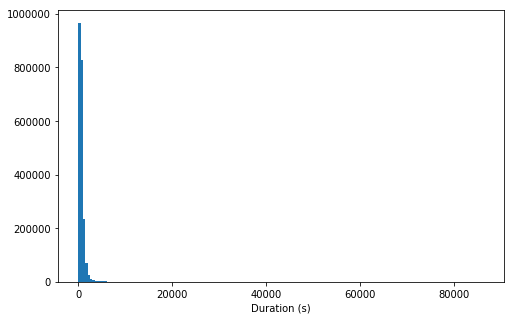

In [30]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (s)')
plt.show()

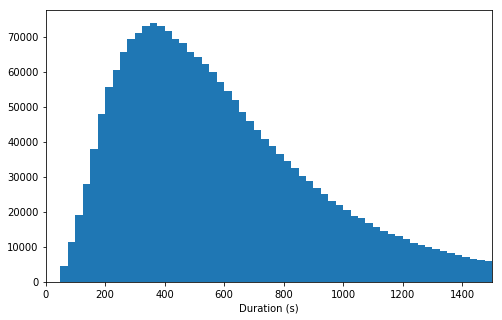

In [31]:
# x limits for bulk of distribution
binsize = 25
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (s)')
plt.xlim(0, 1500)

plt.show()

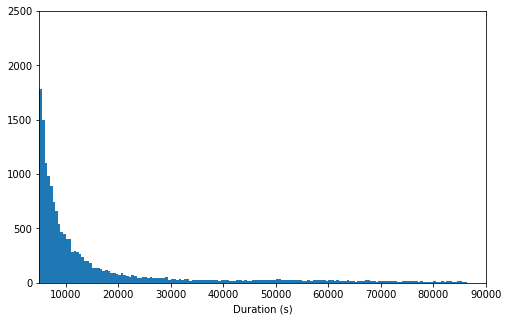

In [32]:
# x limits for tail of distribution
binsize = 500
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (s)')
plt.xlim(5000, 90000)
plt.ylim(0, 2500)
plt.show()

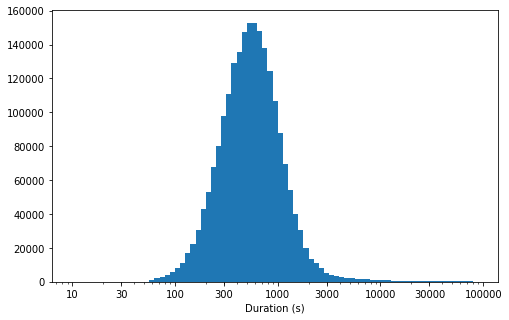

In [33]:
# log x scale of distribution
binsize = .05
bins = 10 ** np.arange(1, np.log10(df.duration_sec.max())+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (s)')
plt.xscale('log')
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.xticks(ticks, ticks)
plt.show()

The bike journey duration has a very long tailed distribution which is skewed to the right. On the initial plot it unclear as to whether there is a single outlier or there are multiple data points on the right of the plot. Zooming into the right side of the graph in the second plot, it is clear that there are multiple data points. Due to the data ranging over multiple magnitudes of order it would be better represented on a log axis, as seen in the third graph. The data appears to be unimodal.

Next up, the first predictor variable of interest: gender.

In [36]:
df.member_gender.value_counts()

Male      1627863
Female     533552
Other           0
Name: member_gender, dtype: int64

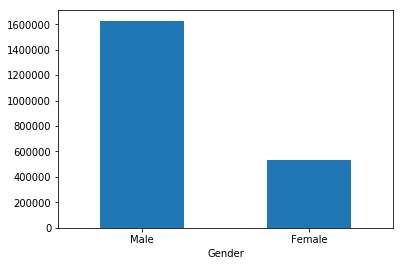

In [129]:
df.member_gender.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Gender');

The data consists of majority males. The males are more numerous compared to the females by 3 times and 5 times compared to people who don't conform to conventional gender groups.

The next variable is the members birth years.

In [38]:
df.member_birth_year.max(), df.member_birth_year.min()

(2000, 1881)

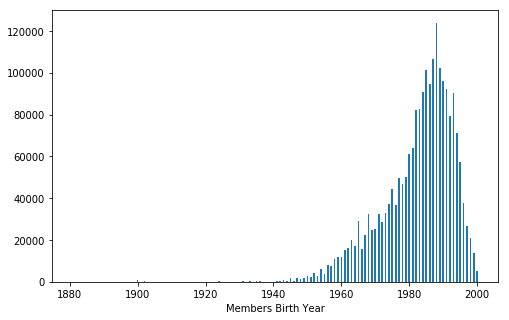

In [39]:
# standard-scaled plot of birth year
binsize = 1
bins = np.arange(df.member_birth_year.min()-.5, df.member_birth_year.max()+binsize+.5, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins, rwidth = 0.5)
plt.xlabel('Members Birth Year')

plt.show()

In [136]:
df = df[df.member_birth_year>1940]

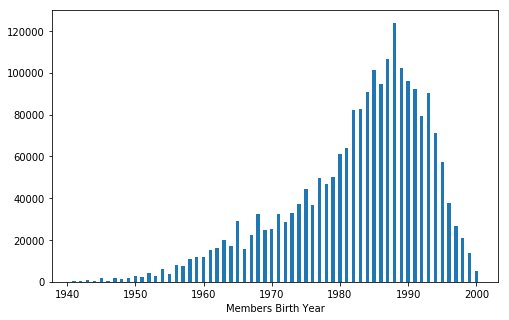

In [41]:
# standard-scaled plot of birth year without outliers
binsize = 1
bins = np.arange(df.member_birth_year.min()-.5, df.member_birth_year.max()+binsize+.5, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins, rwidth = 0.5)
plt.xlabel('Members Birth Year')

plt.show()

The distribution of the birth years is skewed to the left. The data points before the year 1940 appear more dispered and less frequent and may be outliers. These values are a lot lower than the 25% percentile of 1977. The second histogram with the values removed looks like a better distribution. There are more younger memebers which use this bike sharing platform.

The next variable is user type.

In [42]:
df.user_type.value_counts()

Subscriber    1915702
Customer       242840
Name: user_type, dtype: int64

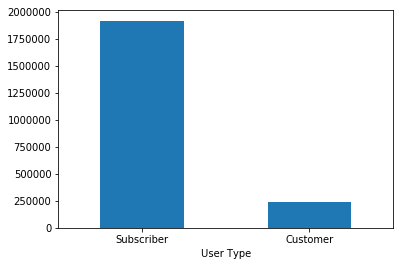

In [43]:
df.user_type.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('User Type');

The subscriber frequency is about 7 times more than the normal customers.

Next up is the start hour.

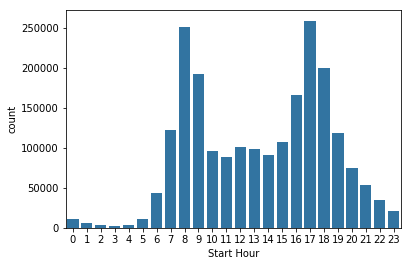

In [44]:
# plot for time of day
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='start_hour', color = base_color)
plt.xlabel('Start Hour');

The start hour seems to have a bimodal distribution with modes around 08:00 and 17:00. The early mornings are the quietest times.

Next is the days of the week.

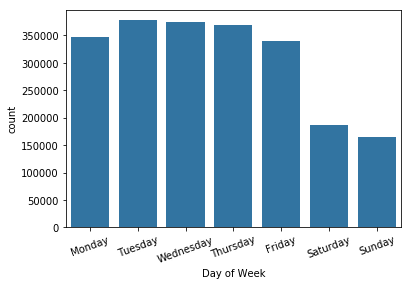

In [45]:
# plot for days of the week
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='day_of_week', color = base_color)
plt.xticks(rotation=20)
plt.xlabel('Day of Week');

Bikes are rented a lot more on weekdays and there is a serious drop off over the weekend by roughly 50%. Tuesday is busiest day in the week but only marginally,

Next is the months in the year.

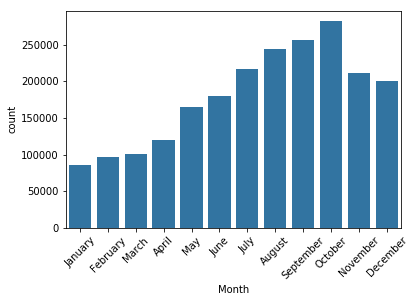

In [46]:
# plot for month of year
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='month', color = base_color)
plt.xticks(rotation=45)
plt.xlabel('Month');

October is the busiest month. The second part of the year appears to have the most rentals. However, the data in 2017 only starts from June so this may skew the results.

Next up is the start station.

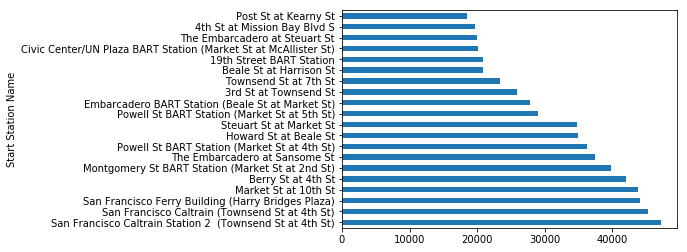

In [47]:
# plot station names
df.start_station_name.value_counts()[0:20].plot(kind='barh')
plt.ylabel('Start Station Name');

The most frequent station where bikes are rented is San Francisco Caltrain Station 2. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration ranged over a few magnitudes so I performed a log transformation on the x axis. It is a unimodal distribution with a peak between 350 and 400.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The birth years had a few points which were very far from bulk of the distribution. These points were removed to focus on the bulk on the data.

## Bivariate Exploration

First I will explore the duration and members birth year.

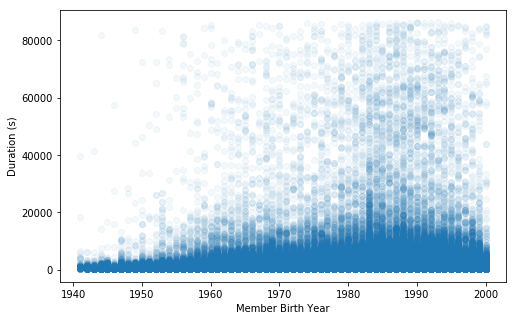

In [48]:
#scatter plot with duration and birth year
plt.figure(figsize=[8, 5])
plt.scatter(df.member_birth_year, df.duration_sec, alpha=0.05)
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (s)'); 

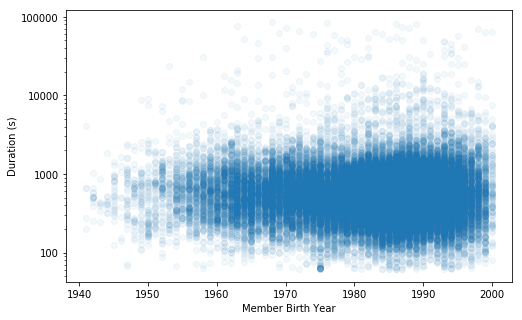

In [50]:
# same plot with log scale on y-axis
plt.figure(figsize=[8, 5])
samp = df.sample(n=50000)
plt.scatter(samp.member_birth_year, samp.duration_sec, alpha=0.05)
plt.yscale('log')
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (s)')
ticks = [100, 1000, 10000, 100000]
plt.yticks(ticks, ticks);

As the duration rangs over many magnitudes the first graph has a high density of data points at the bottom of the chart. Correcting this with a log scale in the second graph the data points are more in the middle. There is not a clear relationship but the data is densest around 1000s. The data points follow a cone shape which fans out more with and increasing members birth year meaning a decreasing members age. So the longer trips are more characteristic of the younger members. Also the data become more dense with an increasing members birth year, meaning more young people use the platform.

Next duration and start hour will be looked at.

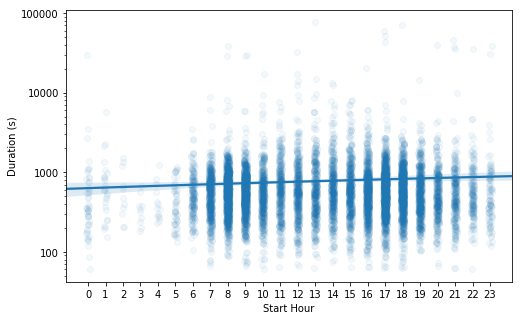

In [51]:
#scatter plot with start hour and duration
plt.figure(figsize=[8, 5])
sb.regplot(x='start_hour', y='duration_sec', data=df.sample(n=10000), scatter_kws = {'alpha' : 0.05}, x_jitter = 0.1)
plt.yscale('log')
plt.xlabel('Start Hour')
plt.ylabel('Duration (s)')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
ticks = [100, 1000, 10000, 100000]
plt.yticks(ticks, ticks);

Journeys are more frequent from 04:00 as seen in the univariate plot as data points become more dense after 4 AM. For the longer journeys in the magnitude of 10$^{4}$ and higher, there seems to be a higher density of points from 08:00. This is seen with the slight positive regression line plotted by the function.

Next will be the duration and gender.

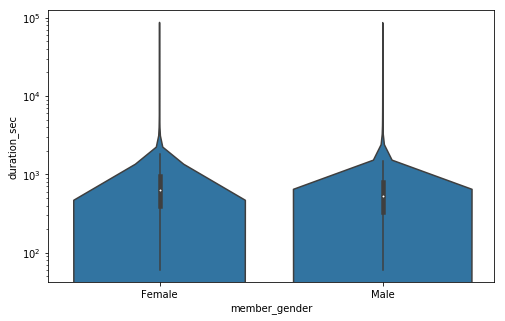

In [138]:
#violin plot of duration and gender
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.2), x = 'member_gender', y = 'duration_sec', color = base_color)
plt.yscale('log')

<Figure size 576x360 with 0 Axes>

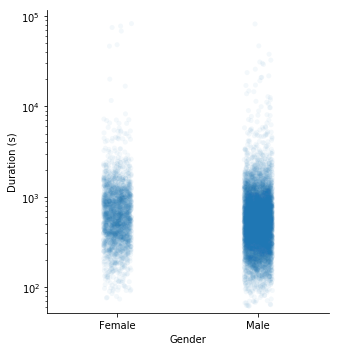

In [131]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.catplot(x='member_gender', y='duration_sec', data=df.sample(n=10000), alpha= 0.05, color = base_color)
plt.yscale('log')
plt.xlabel('Gender')
plt.ylabel('Duration (s)');

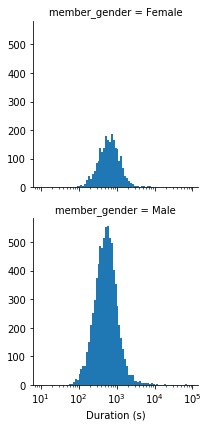

In [132]:
binsize = .05
bins = 10 ** np.arange(1, np.log10(df.duration_sec.max())+binsize, binsize)

g = sb.FacetGrid(data = df.sample(n=10000), col = 'member_gender', col_wrap = 1, height = 3)
g.map(plt.hist, 'duration_sec', bins = bins)
plt.xlabel('Duration (s)')
plt.xscale('log');

These three plot all shows the relationship between duration and gender. There doesn't seem to be much relationship between these two variables as it can be clearly seen in the last plot (histogram). The male peak is slightly to the left of the female peak, but it does not seem significant. The male distribution is wider than the female distribution. As seen in the violin plot and the catplot the two genders have the same shape are are very similar.

Next will be the user type and the duration.

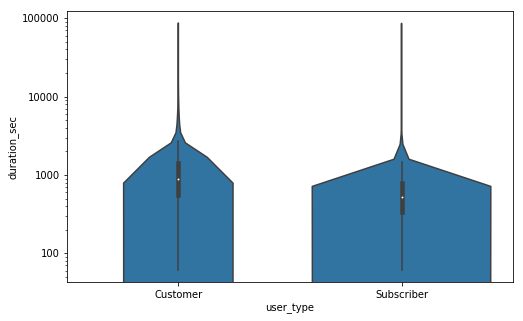

In [56]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.2), x = 'user_type', y = 'duration_sec', color = base_color)
plt.yscale('log')
ticks = [100, 1000, 10000, 100000]
plt.yticks(ticks, ticks);

<Figure size 576x360 with 0 Axes>

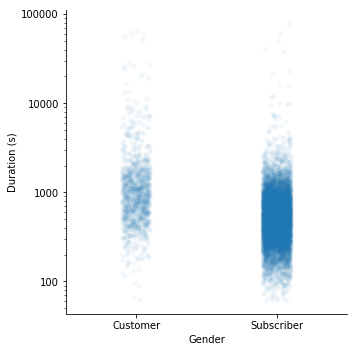

In [57]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.catplot(x='user_type', y='duration_sec', data=df.sample(n=10000), alpha= 0.05, color = base_color)
plt.yscale('log')
plt.xlabel('Gender')
plt.ylabel('Duration (s)')
ticks = [100, 1000, 10000, 100000]
plt.yticks(ticks, ticks);

As shown in both these graphs, the shorter journeys of 200 secs and lower seem to predominately taken by subscribers. There doesn't seem to be much correlation between the longer journeys and the user type as both seem to be taken equally by both.

Next will be duration vs some of the categorical variables.

In [58]:
categoric_vars = ['member_gender', 'user_type', 'day_of_week', 'month']

<Figure size 1440x720 with 0 Axes>

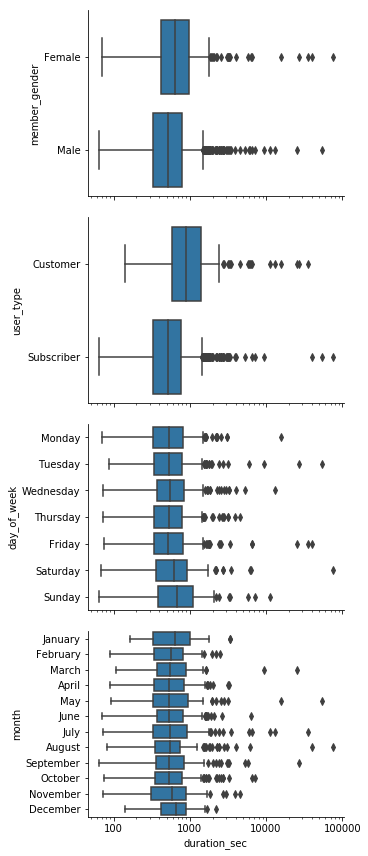

In [139]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 10])
g = sb.PairGrid(data = df_samp, y_vars = categoric_vars, x_vars = ['duration_sec'],
                height = 3, aspect = 1.5)

plt.xscale('log')
ticks = [100, 1000, 10000, 100000]
plt.xticks(ticks, ticks)
g.map(boxgrid);

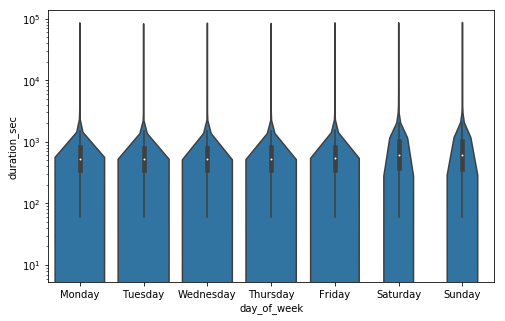

In [60]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.2), x = 'day_of_week', y = 'duration_sec', color = base_color)
plt.yscale('log')

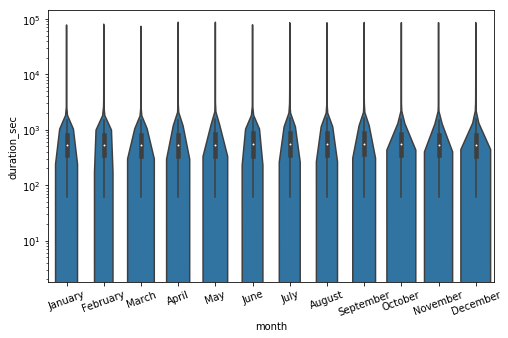

In [61]:
#violin plot of duration against month
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.1), x = 'month', y = 'duration_sec', color = base_color)
plt.yscale('log')
plt.xticks(rotation=20);

In the boxplots the male median is lower than the female median, which confirms what the histogram earlier showed. For the user type the subscriber median is lower than the customer median. The days in the weekend has higher medians than the days in the week. There does not seem to be much interaction between the month and the duration which is also shown with the violin plot. 

Next will be the user type with other catergorical variables.

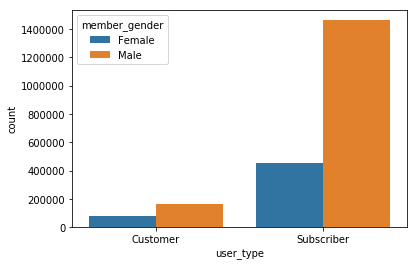

In [140]:
sb.countplot(data = df, x = 'user_type', hue = 'member_gender');

In this graph there is a significantly higher proportion of males which are subscribers compared to customers (around 50%). 

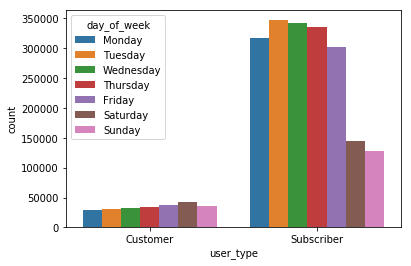

In [63]:
sb.countplot(data = df, x = 'user_type', hue = 'day_of_week');

The day of the week doesn't seem to have much interaction for the customer. However for the subscriber there is a significant drop off in the amount of people who rent bikes on the weekend by up to about 50%.

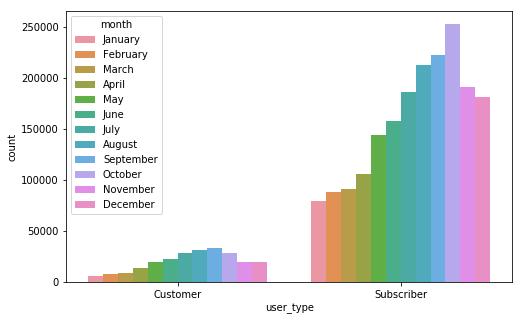

In [64]:
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'user_type', hue = 'month');

There does not seem to be a relationship between the user type and the month. The month of october is different but the correlation is not clear.

The next plots will be the user type and the numeric variables.

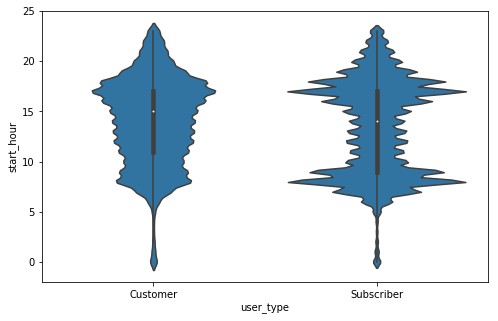

In [65]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.5), x = 'user_type', y = 'start_hour', color = base_color);

In the violin plot the peak at 08:00 is does not protrude as much for the customer compared to the subscriber.

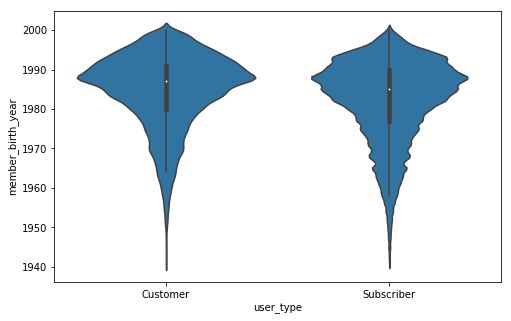

In [66]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.5), x = 'user_type', y = 'member_birth_year', color = base_color);

This violin plot also has the same shape for birth year so there is not much interaction between the user type and the birth year.

Next will be gender vs the member birth year.

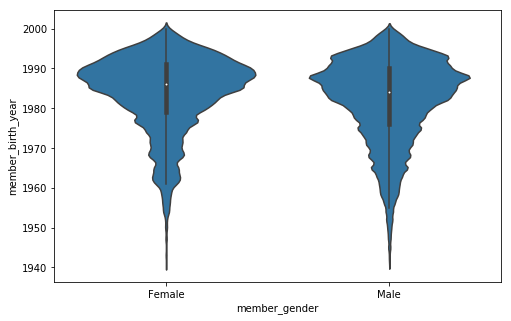

In [141]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.5), x = 'member_gender', y = 'member_birth_year', color = base_color);

There is females have a higher median compared to the males. The distrbution is very similar though.

Next is the birth year and the start hour.

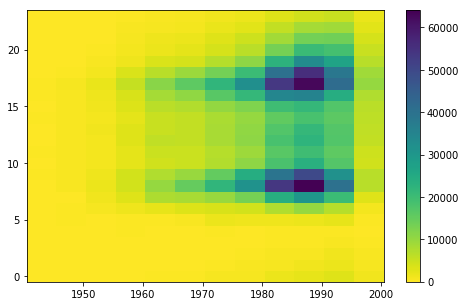

In [68]:
plt.figure(figsize=[8, 5])
bins_x = np.arange(df.member_birth_year.min()-.5, df.member_birth_year.max()+binsize+.5, 5)
bins_y = np.arange(df.start_hour.min()-.5, df.start_hour.max()+binsize+.5, 1)
plt.hist2d(data = df, x = 'member_birth_year', y = 'start_hour',
           bins = [bins_x, bins_y], cmap = 'viridis_r')
plt.colorbar();

There is two dark patches corresponding to 8:00 and 17:00 which was seen in the unvariate plot. As the years increases the density around these times become denser and denser. This could be due to there beeing a higher number of young people compared to older people.

Next will be the birth year with the day of week and month.

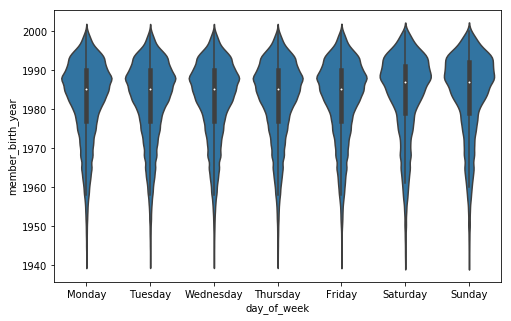

In [69]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.5), x = 'day_of_week', y = 'member_birth_year', color = base_color);

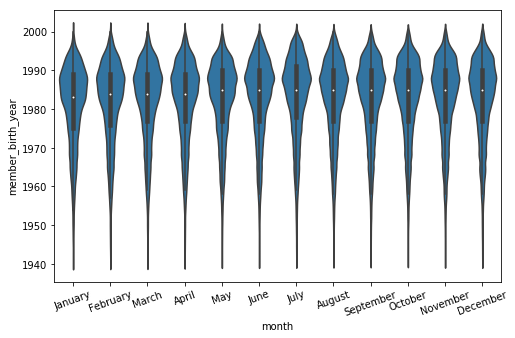

In [70]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.5), x = 'month', y = 'member_birth_year', color = base_color)
plt.xticks(rotation=20);

In both plots there isn't much interaction between either variable. 

Next will be start hour against gender.

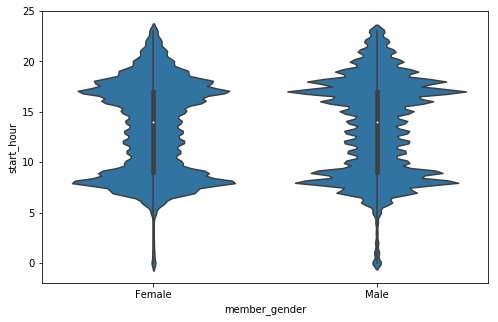

In [142]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.5), x = 'member_gender', y = 'start_hour', color = base_color);

The shape of each violin plot is the same for each gender and so there no interaction between the start hour and the gender. The smoothness of the curve corresponds to the amount of data points with each gender as the start hour variable is discrete. Males are most frequent and therefore the plot is roughest. 

Next is the gender vs the day of the week and the month. 

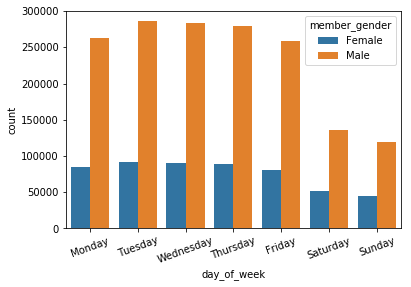

In [143]:
sb.countplot(data = df, x = 'day_of_week', hue = 'member_gender')
plt.xticks(rotation=20);

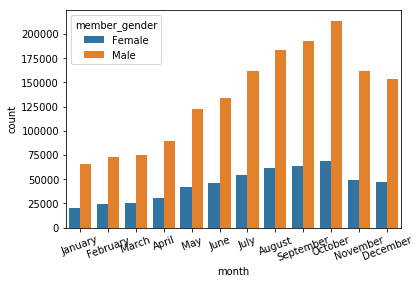

In [144]:
sb.countplot(data = df, x = 'month', hue = 'member_gender')
plt.xticks(rotation=20);

There is no relationship between the gender and the month. Whenever there is a change in bar height its proportional for both genders. However for the lower proportion of males riding n the weekend compared to the weekday.

Next up is the start hour vs the day of the week and the month.

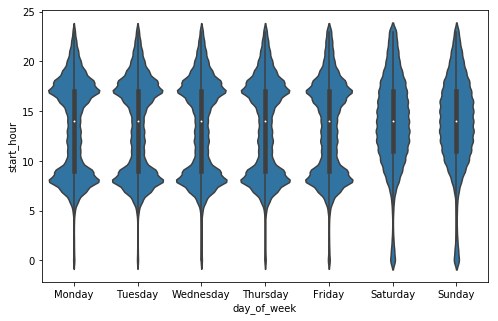

In [167]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.5), x = 'day_of_week', y = 'start_hour', color = base_color);

The weekend curves do not have the characteristic two peaks at 8:00 and 17:00 and is a rounded shaped. This says that people rent bikes throughout the day move evenly on the weekend compared to the weekday. I suspect this is related to work hours in the week.

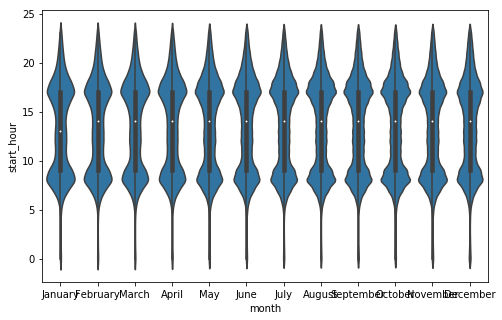

In [75]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df.sample(frac=.5), x = 'month', y = 'start_hour', color = base_color);

There is no interaction between the month and start hour.

In [21]:
from bokeh.io import output_file, output_notebook, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, LogColorMapper, BasicTicker, ColorBar,
    Range1d, PanTool, WheelZoomTool, BoxSelectTool
)
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5


map_options = GMapOptions(lat=37.81, lng=-122.34, map_type="roadmap", zoom=11)

plot = GMapPlot(
    x_range=Range1d(), y_range=Range1d(), map_options=map_options
)
plot.title.text = "Start Station Location"

# For GMaps to function, Google requires you obtain and enable an API key:
#
#     https://developers.google.com/maps/documentation/javascript/get-api-key
#
# Replace the value below with your personal API key:
plot.api_key = "API KEY"

samp=df.sample(n=1000)

source = ColumnDataSource(
    data=dict(
        lat=samp.start_station_latitude.tolist(),
        lon=samp.start_station_longitude.tolist()
    )
)

circle = Circle(x="lon", y="lat", size=5, fill_color="blue", fill_alpha=0.5, line_color=None)
plot.add_glyph(source, circle)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
output_file("gmap.html")
output_notebook()

show(plot)

Loading BokehJS ...

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Duration of trips had a slight corelation with this member birth year. Trips were more frequent with younger members and longer trips were characteristic more so of for younger members. The younger members had a a much higher spread of duration compared to older members. However, it is not clear if this could be due to there being a greater number of younger members. Men have a smaller median for the duration of their trips compared to females suggesting that females generally take longer trips on the bikes. Subcribers also characterically have a shorter duration of rides when compared to customers when the median is looked at. The day of the week also seemed to play a role in the duration of the trip with the weekend having a significant increase compared to the weekday.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The subcribers have a higher proportion of men compared to the customers. The user tpye has an effect of the bimodal nature of the start hours. Customers do not ride as much at 08:00 (the first peak) compared to subscribers. The day of week also affect this bimodal nature, with there only being one peak in the weekend compared to the weekday. There is also a lower proportion of male to female trips on the weekend vs the weekday. The females in the dataset have a younger age compared to the men when looking at the median.  

## Multivariate Exploration

The main area of investigation will look at how the categorical variables play into the relationship between the duration and the birth year.

First will be the member gender on the duration vs member birth year.

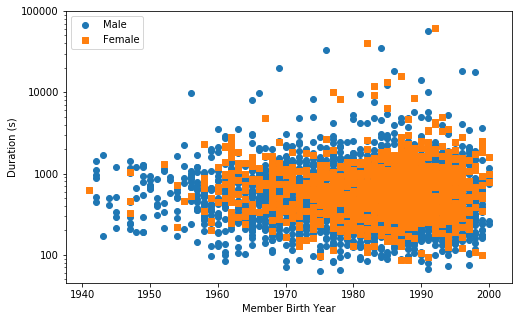

In [161]:
plt.figure(figsize=[8, 5])
samp = df.sample(n=5000)

gender_markers = [['Male', 'o'],
               ['Female', 's']]

for gender, marker in gender_markers:
    df_cat = samp[samp['member_gender'] == gender]
    plt.scatter(data = df_cat, x = 'member_birth_year', y = 'duration_sec', marker = marker)
plt.legend(['Male', 'Female', 'Other'])

plt.yscale('log')
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (s)')
ticks = [100, 1000, 10000, 100000]
plt.yticks(ticks, ticks);

This plot has the same shape as the bivariate version. The female points seem to be slightly shifted to the right of the male plots meaning younger age, comfirming the violin plot earlier. However the points between the genders don't seem to have a difference vertically.

In [146]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df['log_duration'] = df['duration_sec'].apply(log_trans)

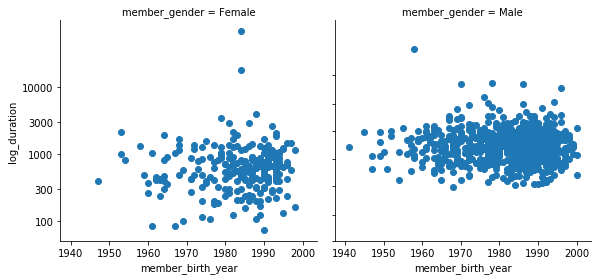

In [163]:
samp = df.sample(n=1000)

g = sb.FacetGrid(data = samp, col = 'member_gender', col_wrap = 3, height=4)
g.map(plt.scatter, 'member_birth_year', 'log_duration')

plt.yticks(log_trans(np.array([10, 30, 100, 300, 1e3, 3e3, 1e4])),
               [10, 30, 100, 300, 1000, 3000, 10000]);

However in this plot with a smaller sample size the male distribution seems a bit higher than the female points, suggesting a longer journey time.

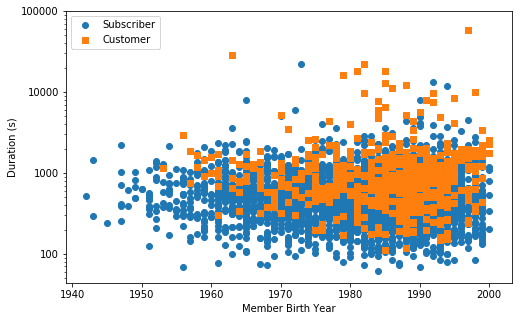

In [148]:
plt.figure(figsize=[8, 5])
samp = df.sample(n=5000)

cat_markers = [['Subscriber', 'o'],
               ['Customer', 's']]

for gender, marker in cat_markers:
    df_cat = samp[samp['user_type'] == gender]
    plt.scatter(data = df_cat, x = 'member_birth_year', y = 'duration_sec', marker = marker)
plt.legend(['Subscriber', 'Customer'])

plt.yscale('log')
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (s)')
ticks = [100, 1000, 10000, 100000]
plt.yticks(ticks, ticks);

The customer data points are clustered towards the top right of the subscriber data points, meaning the customers are slightly younger and are taking longer journeys on average compared to the subscribers.

The next plot will look at the duration against categorical variables.

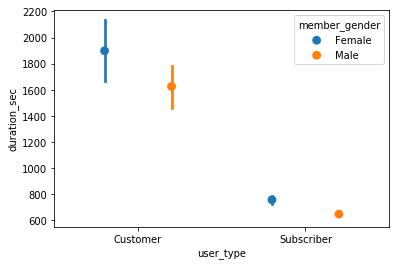

In [164]:
samp = df.sample(n=50000)
sb.pointplot(data = samp, x = 'user_type', y = 'duration_sec', hue='member_gender', linestyles = '', dodge = 0.4);

This plot confirms the conclusion of the last plots as it shows the subscribers have a shorter journey compared to the customers and the males shorter compared to the females.

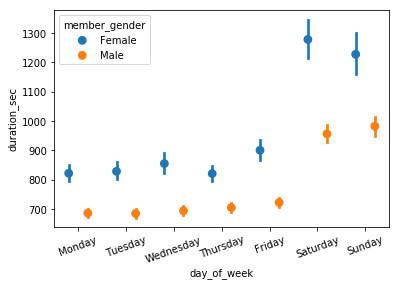

In [166]:
samp = df.sample(n=500000)
sb.pointplot(data = samp, x = 'day_of_week', y = 'duration_sec', hue='member_gender', linestyles = '', dodge = 0.4)
plt.xticks(rotation=20);

This plot shows that the weekend has a significant increase in trip duration compared to the weekday.

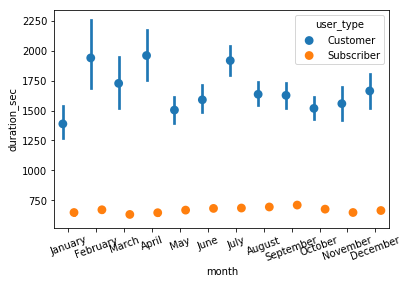

In [84]:
samp = df.sample(n=500000)
sb.pointplot(data = samp, x = 'month', y = 'duration_sec', hue='user_type', linestyles = '', dodge = 0.4)
plt.xticks(rotation=20);

There are ups and down for the duration of trips from month to month but there isnt a clear trend.

Next two plots will look at how the day of week and month affect the duration vs birth year plot.

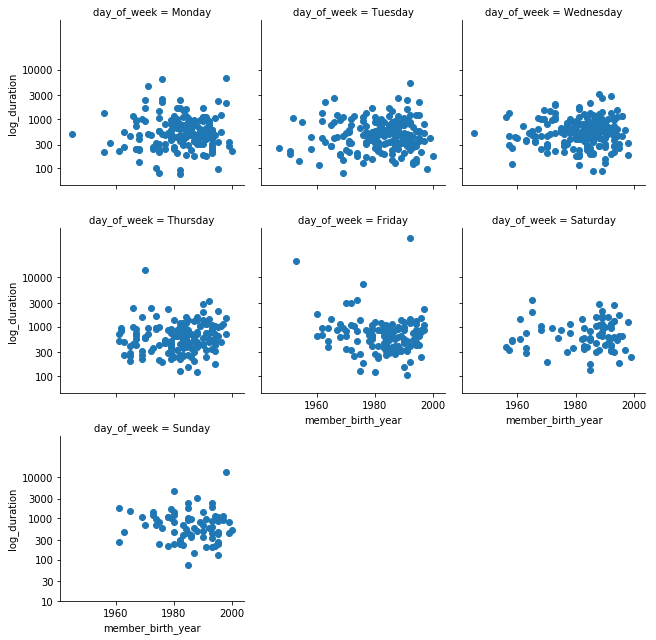

In [89]:
samp = df.sample(n=1000)

g = sb.FacetGrid(data = samp, col = 'day_of_week', col_wrap = 3)
g.map(plt.scatter, 'member_birth_year', 'log_duration')
plt.yticks(log_trans(np.array([10, 30, 100, 300, 1e3, 3e3, 1e4])),
               [10, 30, 100, 300, 1000, 3000, 10000]);

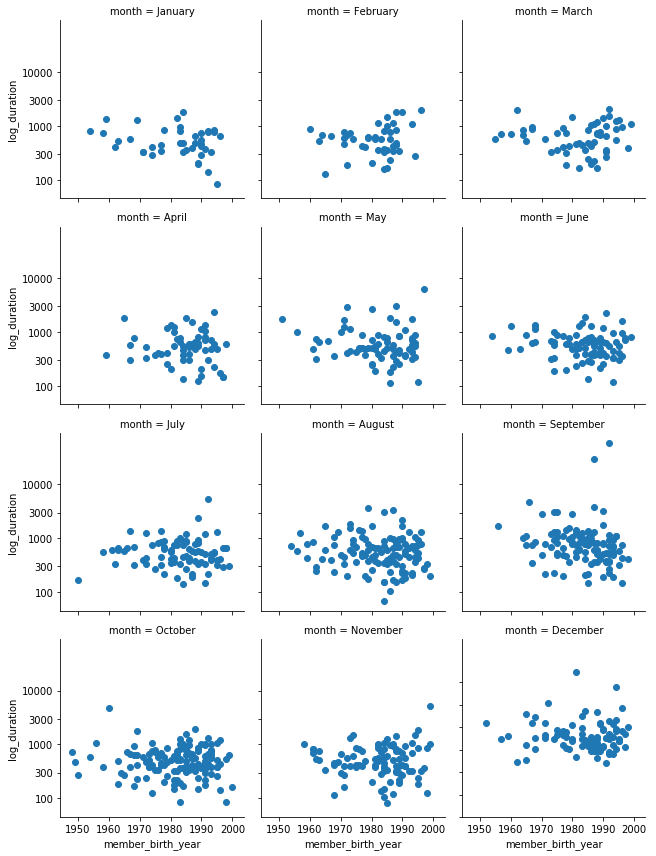

In [90]:
samp = df.sample(n=1000)

g = sb.FacetGrid(data = samp, col = 'month', col_wrap = 3)
g.map(plt.scatter, 'member_birth_year', 'log_duration')

plt.yticks(log_trans(np.array([10, 30, 100, 300, 1e3, 3e3, 1e4])),
               [10, 30, 100, 300, 1000, 3000, 10000]);

There does not seem to be a clear relationship when the plot is faceted over the day of week or the month.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I looked at the impact of the catergorical variables had over the duration vs birth year graph. Gender, day of week and month did not seem to have much interation with this graph. However, the user type seemed to have a bigger effect with customers taking longer trips and being slightly younger compared to subscribers. 

### Were there any interesting or surprising interactions between features?

The weekends seem to have longer trips than the weekdays. Other than that there aren't interesting interactions between variables.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [165]:
#save dataframe
df.to_csv('ford_bike_tripdata_201718.csv', index=False)